In [1]:
#install specific version of libraries used in lab
! mamba install pandas==1.3.3
! mamba install numpy=1.21.2
! mamba install scipy=1.7.1-y
!  mamba install seaborn=0.9.0-y
!  mamba install matplotlib=3.4.3-y


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.27.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['pandas==1.3.3']

[+] 0.0s
opt/ibm/custom-channels/meta-wscloud/linux-64 ━━━━━━━━━━━━━╸━━━━━━   0.


Looking for: ['seaborn=0.9.0-y']

pkgs/main/linux-64                                          Using cache
pkgs/main/noarch                                            Using cache
[+] 0.0s
opt/ibm/custom-channels/meta-wscloud/linux-64 ━━━━╸━━━━━━━━━━━━━━━   0.0 B  0.0s
opt/ibm/custom-channels/meta-wscloud/noarch   ━━━━╸━━━━━━━━━━━━━━━   0.0 B  0.0sopt/ibm/custom-channels/meta-wscloud/linux-64       0.0s
opt/ibm/custom-channels/meta-wscloud/noarch         0.0s
opt/ibm/custom-channels/placebo-20230406-noarch/..  ??.?MB @  ??.?MB/s 0 failed  0.0s
opt/ibm/custom-channels/placebo-20230406-noarch/..   5.9kB @  81.8MB/s  0.0s

Pinned packages:
  - python 3.10.*
  - python 3.10.*
  - widgetsnbextension 3.5.2.*


Encountered problems while solving:
  - nothing provides requested seaborn 0.9.0-y**


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  /

In [2]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 4a - For the "Median value of owner-occupied homes" provide a boxplot

The following graph is a boxplot showing the median value of owner-occupied homes in Boston, plotting the variable MEDV from the boston_df dataframe. It can be seem that the median value is 22, and there is a high number of outliers which exceed the upper quartile.

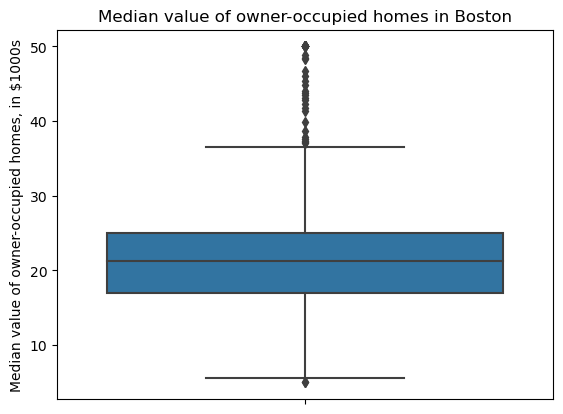

In [7]:
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set(ylabel='Median value of owner-occupied homes, in $1000''s')
ax.set(title='Median value of owner-occupied homes in Boston')
plt.show()

## Task 4b - Provide a  bar plot for the Charles river variable

The following graph is a bar plot showing the values of the Charles river variable in Boston, plotting the count of the variable CHAS from the boston_df dataframe. It can be seem that most houses are not in close proximity to the river (value=0), and a smaller number bounded by the river (value=1).

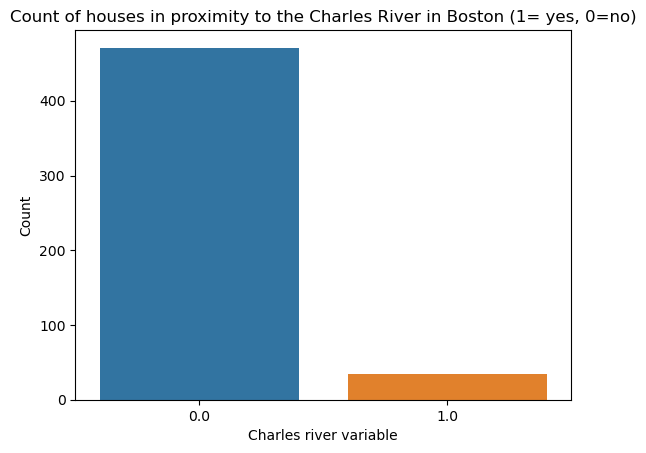

In [15]:
df=boston_df.groupby('CHAS').count().reset_index()
ax = sns.barplot(x="CHAS", y= 'Unnamed: 0', data=df)
ax.set(xlabel='Charles river variable', ylabel='Count')
ax.set(title='Count of houses in proximity to the Charles River in Boston (1= yes, 0=no)')
plt.show()

## Task 4c - Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

The following graph is a boxplot showing the median value of owner-occupied homes in Boston, plotting the variable MEDV from the boston_df dataframe. <br>
As opposed to Task 4a, the data is now split in categories between age ranges of the house. <br>
It can be seem that the median value varies between categories, and there is a high number of outliers which exceed the upper quartile.

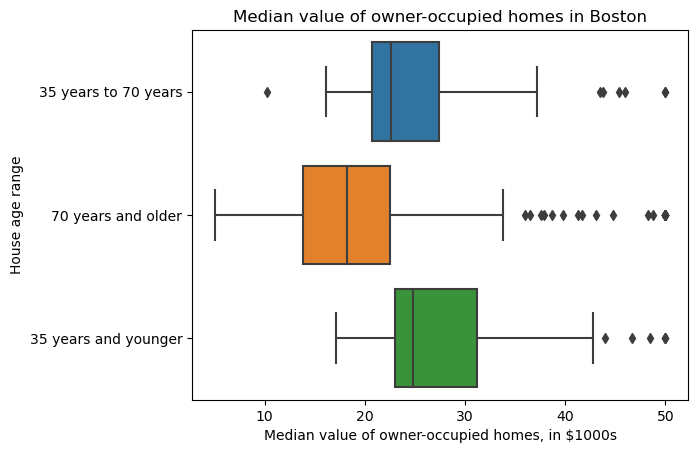

In [12]:
boston_df.loc[(boston_df['AGE']<=35), 'age_range']='35 years and younger'
boston_df.loc[((boston_df['AGE']>35)&(boston_df['AGE']<=75)), 'age_range']='35 years to 70 years'
boston_df.loc[(boston_df['AGE']>70), 'age_range']='70 years and older'
boston_df.head()
ax = sns.boxplot(x='MEDV', y='age_range', data=boston_df)
ax.set(xlabel='Median value of owner-occupied homes, in $1000''s', ylabel='House age range')
ax.set(title='Median value of owner-occupied homes in Boston')
plt.show()

## Task 4d - Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

The following graph is a scatter plot showing the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town in Boston. <br>
It can be seem that there is a positive linear correlation between the two variables.

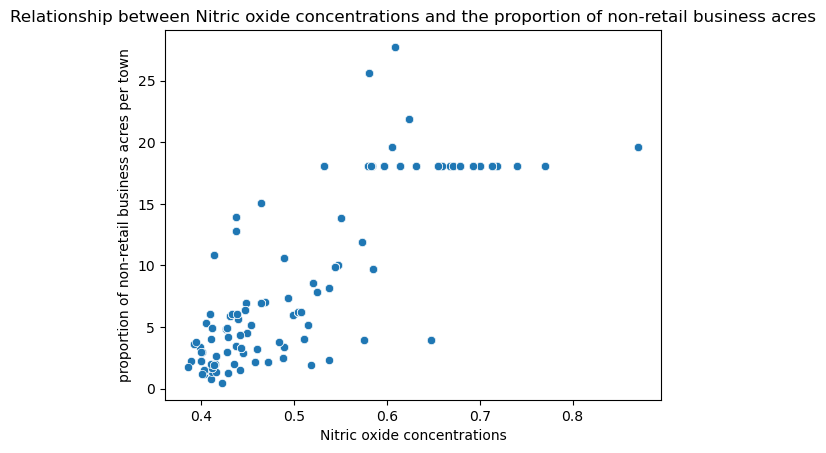

In [13]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set(xlabel='Nitric oxide concentrations', ylabel='proportion of non-retail business acres per town')
ax.set(title='Relationship between Nitric oxide concentrations and the proportion of non-retail business acres')
plt.show()

Answer: The scatter plot above indicates that there is a linear positive relationship between these two variables.

## Task 4e - Create a histogram for the pupil to teacher ratio variable

The following graph is a histogram showing the pupil to teacher ratio variable, collected into 7 bins. It can be seen that most areas in Boston have a ratio of around 20.

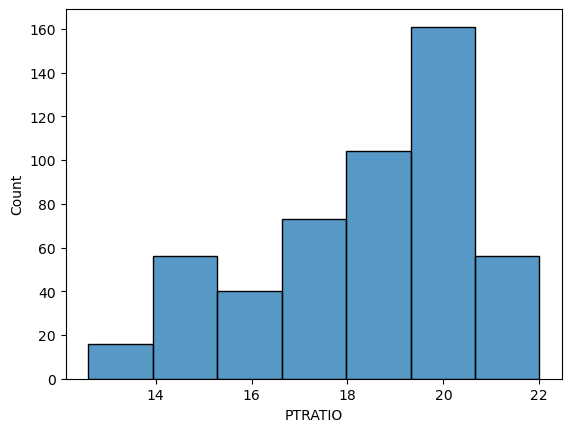

In [14]:
sns.histplot(boston_df['PTRATIO'], bins=7)
ax.set(xlabel='pupil to teacher ratio')
ax.set(title='Pupil to teacher ratio for the areas in Boston')
plt.show()

## Task 5a - Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null hypothesis: there is no significant difference in median values of houses.  <br>
Alternative hypothesis: there is significant difference in median values of houses <br>
α = 0.05

In [44]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1] [ 'MEDV'], boston_df[boston_df['CHAS'] == 0] [ 'MEDV'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

### Conclusion: <br>
The p-value is 7.390623170519905e-05 (less than 0.05), therefore we reject the null hypothesis and conclude that there is a statistical significance to the fact that median house price varies depending on whether the house is bounded by the river.

## Task 5b - Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


Null hypothesis: there is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 <br>
Alternative hypothesis: there is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 <br>
α = 0.05

In [50]:
Thirtyfive_lower = boston_df[boston_df['age_range'] == '35 years and younger']['MEDV']
Seventy_older = boston_df[boston_df['age_range'] == '35 years to 70 years']['MEDV']
Mid_age_range = boston_df[boston_df['age_range'] == '70 years and older']['MEDV']


f_statistic, p_value = scipy.stats.f_oneway(Thirtyfive_lower, Seventy_older, Mid_age_range)
print("P-Value: ", p_value)

P-Value:  1.7105011022702984e-15


### Conclusion: <br>
The p-value is less than 0.05, and therefore we reject the null hypothesis and conclude that there is a significant difference caused by the age of house.

## Task 5c - Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)



Null hypothesis: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town <br>
Alternative hypothesis: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town <br>
α = 0.05

In [55]:
P_coeff, P_value=scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("P-Value: ", P_value)
print("Pearson Coefficient: ", P_coeff)

P-Value:  7.913361061238693e-98
Pearson Coefficient:  0.7636514469209151


### Conclusion: <br>
No we cannot. The Pearson coefficient is positive and relatively close to 1, meaning that there is a reasonable positive correlation between Nitric oxide concentrations and proportion of non-retail business acres per town. The P-value is very small, meaning that we reject the null hypothesis and conclude that there is a relationship.

## Task 5d - What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null hypothesis: there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes <br>
Alternative hypothesis: there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes <br>
α = 0.05

In [57]:
import statsmodels.api as sm
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        20:52:18   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion: <br>
p-value is smaller than 0.05 and we can therefore conclude that there is a correlation between these two variables.